For our Statistics with Python, we will use the `penguins` dataset from Seaborn. This is a set of measurements of three penguin species endemic in the Antartic region.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Load data set and show the first few rows
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
# Cleaning up the data
species = penguins.set_index('species')
species

# Filling empty entries with 0
species.fillna(0)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
Adelie,Torgersen,0.0,0.0,0.0,0.0,0
Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...
Gentoo,Biscoe,0.0,0.0,0.0,0.0,0
Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


Now, using the `pd.groupby()` method to group rows in terms of the column that we desire. In this case, we group them by species. 

The `.agg()` method is used as we call numpy functions, `np.mean` and `np.std` (passed as a list since they're two). 

In [3]:
means_by_species = penguins.groupby('species').agg([np.mean, np.std])
means_by_species

bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
species                                                                        
Adelie         38.791391  2.663405     18.346358  1.216650        189.953642   
Chinstrap      48.833824  3.339256     18.420588  1.135395        195.823529   
Gentoo         47.504878  3.081857     14.982114  0.981220        217.186992   

                     body_mass_g              
                std         mean         std  
species                                       
Adelie     6.539457  3700.662252  458.566126  
Chinstrap  7.131894  3733.088235  384.335081  
Gentoo     6.484976  5076.016260  504.116237

We can now see the mean measurements and their standard deviations for each species. 


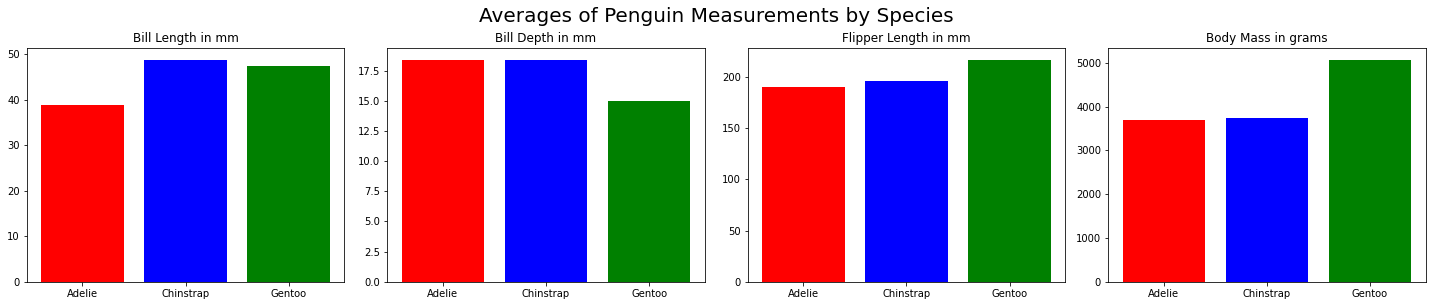

In [4]:
# Plotting and comparing the means
fig, ax = plt.subplots(1, 4, figsize=(20,4))
colors = ['red', 'blue', 'green']

ax[0].bar(x = means_by_species.index, height = means_by_species['bill_length_mm']['mean'], color= colors)
ax[0].set_title('Bill Length in mm')

ax[1].bar(x = means_by_species.index, height = means_by_species['bill_depth_mm']['mean'], color= colors)
ax[1].set_title('Bill Depth in mm')

ax[2].bar(x = means_by_species.index, height = means_by_species['flipper_length_mm']['mean'], color= colors)
ax[2].set_title('Flipper Length in mm')

ax[3].bar(x = means_by_species.index, height = means_by_species['body_mass_g']['mean'], color= colors)
ax[3].set_title('Body Mass in grams')

# Adjust the spacing between the subplots
fig.tight_layout()

# Adding a legend and title
fig.suptitle("Averages of Penguin Measurements by Species", fontsize=20, y=1.05)

# Show the figure
plt.show()

Here, we see each average measurements for each species. From this, we can describe some observations;


*   In terms of bill length, Chinstrap penguins tend to have longer bills, Gentoos are a close second.
*   For bill depth, Adelies and Chinstraps have the deepest bills.
*   Gentoos, on average, has the longest flippers of them three.
*   Gentoos also are the heaviest of the three species.



We shall split the dataframes into each species to see the distribuitions of their measurements.

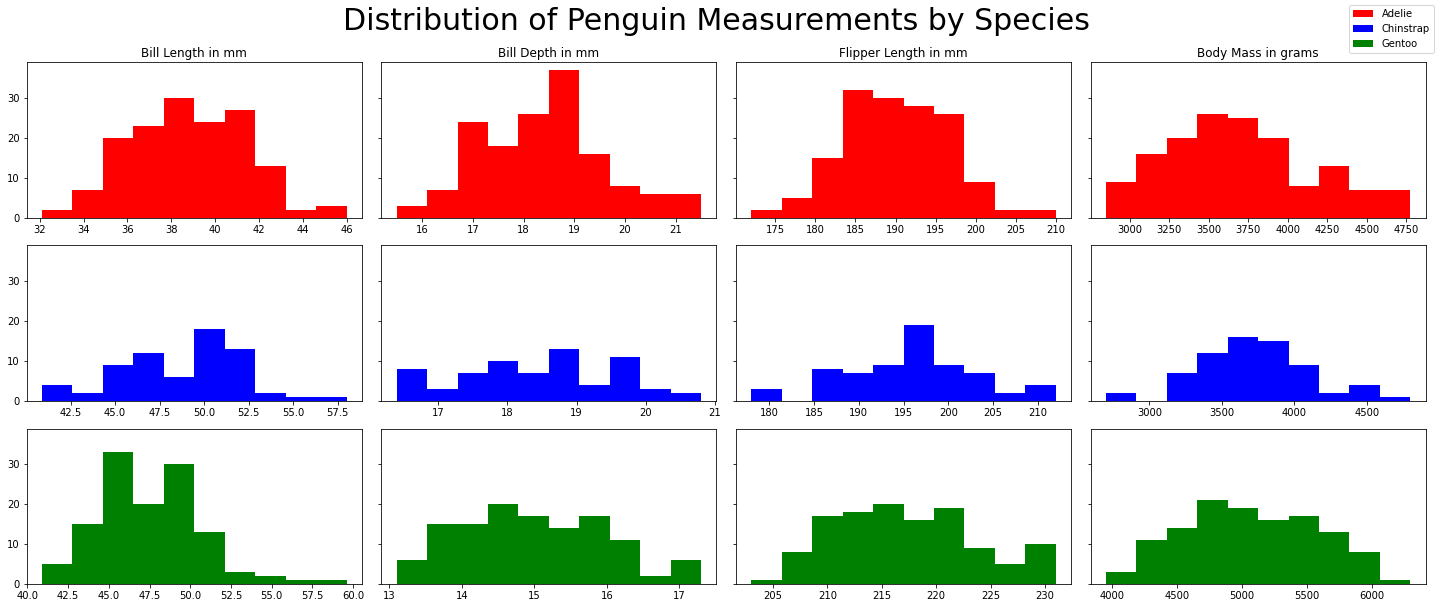

In [5]:
Adelie = penguins[penguins['species'] == 'Adelie']
Chinstrap = penguins[penguins['species'] == 'Chinstrap']
Gentoo = penguins[penguins['species'] == 'Gentoo']


fig, ax = plt.subplots(3, 4, figsize=(20,8), sharey=True)

# Adelie
ax[0, 0].hist(Adelie['bill_length_mm'], color='red', label = 'Adelie')
ax[0, 0].set_title('Bill Length in mm')

ax[0, 1].hist(Adelie['bill_depth_mm'], color='red')
ax[0, 1].set_title('Bill Depth in mm')

ax[0, 2].hist(Adelie['flipper_length_mm'], color='red')
ax[0, 2].set_title('Flipper Length in mm')

ax[0, 3].hist(Adelie['body_mass_g'], color='red')
ax[0, 3].set_title('Body Mass in grams')

# Chinstrap
ax[1, 0].hist(Chinstrap['bill_length_mm'], color='blue', label = 'Chinstrap')

ax[1, 1].hist(Chinstrap['bill_depth_mm'], color='blue')

ax[1, 2].hist(Chinstrap['flipper_length_mm'], color='blue')

ax[1, 3].hist(Chinstrap['body_mass_g'], color='blue')

# Gentoo
ax[2, 0].hist(Gentoo['bill_length_mm'], color='green', label = 'Gentoo')

ax[2, 1].hist(Gentoo['bill_depth_mm'], color='green')

ax[2, 2].hist(Gentoo['flipper_length_mm'], color='green')

ax[2, 3].hist(Gentoo['body_mass_g'], color='green')

# Adjust the spacing between the subplots
fig.tight_layout()

# Adding a legend and title
fig.legend(loc="upper right", frameon= True)
fig.suptitle("Distribution of Penguin Measurements by Species", fontsize=30, y=1.05)

# Show the figure
plt.show()

With enough data, they do resemble a normal distribution, an emergence of the Central Limit Theorem. We can also see that compared to the rest, the Chinstraps has the least measurements, defined by the height of the distribution. 

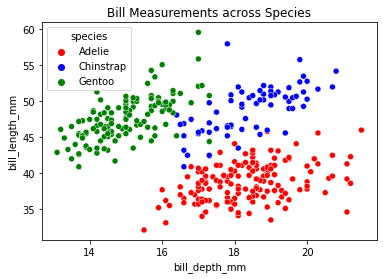

In [6]:
# Scatterplot to distinguish if there are any differences between the bill measurements among each species
sns.scatterplot(y = 'bill_length_mm', x = 'bill_depth_mm', hue = species.index, data = species, palette = colors)
plt.title('Bill Measurements across Species')
plt.show()

We observed that there are a distinction of bill lengths and bill depths across the three species.

In [7]:
# Defining a subjective correlation categories
def correlation(x, y):
  correlation = x.corr(y)
  
  if correlation == -1 or correlation == 1:
    print(correlation, ', They have a perfect linear relationship')
  elif correlation == 0:
    print(correlation, ', They have no distinguishable linear relationship')
  elif (correlation < -0.7 or correlation > 0.7):
    print(correlation, ', They have a strong linear relationship')
  elif (correlation >= -0.5 and  correlation <= -0.7) or (correlation >= 0.5 and  correlation <= 0.7):
    print(correlation, ', They have a moderate linear relationship')  
  elif correlation >= -0.5 or  correlation <= 0.5:
    print(correlation, ', They have a weak linear relationship')

# Comparing correlations
print('Flipper length vs Body mass ', correlation(species['flipper_length_mm'], species['body_mass_g']) ) 
print('Bill length vs Bill depth ' , correlation(species['bill_length_mm'], species['bill_depth_mm']) )


0.8712017673060111 , They have a strong linear relationship
Flipper length vs Body mass  None
-0.2350528703555326 , They have a weak linear relationship
Bill length vs Bill depth  None


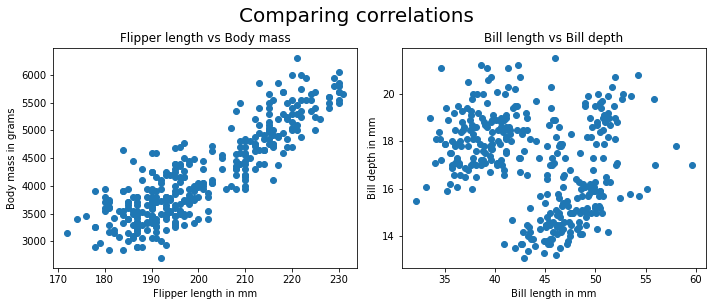

In [8]:
# Plotting and comparing the means
fig, ax = plt.subplots(1, 2, figsize=(10,4))


ax[0].scatter(x = species['flipper_length_mm'], y = species['body_mass_g'])
ax[0].set_title('Flipper length vs Body mass')
ax[0].set_xlabel('Flipper length in mm')
ax[0].set_ylabel('Body mass in grams')

ax[1].scatter(x = species['bill_length_mm'], y = species['bill_depth_mm'])
ax[1].set_title('Bill length vs Bill depth')
ax[1].set_xlabel('Bill length in mm')
ax[1].set_ylabel('Bill depth in mm')

# Adjust the spacing between the subplots
fig.tight_layout()

# Adding a legend and title
fig.suptitle("Comparing correlations", fontsize=20, y=1.05)

# Show the figure
plt.show()